In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [3]:
movies = pd.read_csv("Movie+Assignment+Data.csv") # Write your code for importing the csv file here

-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [4]:
# Write your code for inspection here
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [5]:
# Write your code for column-wise null count here
movies.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
# Write your code for row-wise null count here
movies.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4       14
        ..
5038     4
5039     5
5040     4
5041     2
5042     0
Length: 5043, dtype: int64

In [7]:
# Write your code for column-wise null percentages here
round((movies.isnull().sum()/len(movies.index))*100,2)

color                         0.38
director_name                 2.06
num_critic_for_reviews        0.99
duration                      0.30
director_facebook_likes       2.06
actor_3_facebook_likes        0.46
actor_2_name                  0.26
actor_1_facebook_likes        0.14
gross                        17.53
genres                        0.00
actor_1_name                  0.14
movie_title                   0.00
num_voted_users               0.00
cast_total_facebook_likes     0.00
actor_3_name                  0.46
facenumber_in_poster          0.26
plot_keywords                 3.03
movie_imdb_link               0.00
num_user_for_reviews          0.42
language                      0.24
country                       0.10
content_rating                6.01
budget                        9.76
title_year                    2.14
actor_2_facebook_likes        0.26
imdb_score                    0.00
aspect_ratio                  6.52
movie_facebook_likes          0.00
dtype: float64

-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [8]:
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations 
cols=['color','director_facebook_likes','actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','actor_2_name', 'cast_total_facebook_likes' ,'actor_3_name','duration','facenumber_in_poster','content_rating','country','movie_imdb_link','aspect_ratio','plot_keywords']
movies.drop(cols,axis=1,inplace=True)

-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [9]:
# Write your code for dropping the rows here
# budget and gross has more than 5% null values
movies.drop(movies[movies['budget'].isnull()].index,inplace=True)
movies.drop(movies[movies['gross'].isnull()].index,inplace=True)

-  ### Subtask 2.4: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [10]:
# Write your code for filling the NaN values in the 'language' column here
(movies.isnull().sum()/len(movies.index))*100
movies['language'].fillna('English',inplace=True)

-  ### Subtask 2.5: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [11]:
# Write your code for checking number of retained rows here
100*len(movies.index)/5043

77.15645449137418

**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [12]:
# Write your code for unit conversion here
movies['gross'] = round(movies['gross']/1000000,2)
movies['budget'] = round(movies['budget']/1000000,2)

-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [13]:
# Write your code for creating the profit column here
movies['profit'] = movies['gross']-movies['budget']

In [14]:
# Write your code for sorting the dataframe here
movies.sort_values(by='profit')

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
2988,Joon-ho Bong,363.0,2.20,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,279.0,Korean,12215.50,2006.0,7.0,7000,-12213.30
3859,Chan-wook Park,202.0,0.21,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,131.0,Korean,4200.00,2005.0,7.7,4000,-4199.79
3005,Lajos Koltai,73.0,0.20,Drama|Romance|War,Marcell Nagy,Fateless,5603,45.0,Hungarian,2500.00,2005.0,7.1,607,-2499.80
2323,Hayao Miyazaki,174.0,2.30,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,570.0,Japanese,2400.00,1997.0,8.4,11000,-2397.70
2334,Katsuhiro Ôtomo,105.0,0.41,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,79.0,Japanese,2127.52,2004.0,6.9,973,-2127.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3080,Steven Spielberg,215.0,434.95,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.50,1982.0,7.9,34000,424.45
3024,George Lucas,282.0,460.94,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.00,1977.0,8.7,33000,449.94
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.00,1997.0,7.7,26000,458.67
29,Colin Trevorrow,644.0,652.18,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.00,2015.0,7.0,150000,502.18


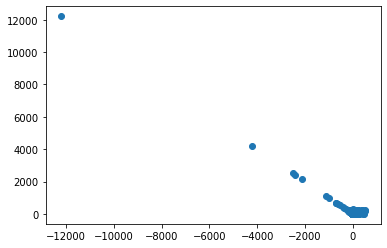

In [15]:
# Write code for profit vs budget plot here
plt.scatter(movies['profit'],movies['budget'])
plt.show()

In [16]:
top10 = movies.sort_values(by='profit',ascending=False)[:10] # Write your code to get the top 10 profiting movies here

-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`. Note that the same `movie_title` can be there in different languages. 

In [18]:
# Write your code for dropping duplicate values here
movies.drop_duplicates(['movie_title','language'],inplace=True)

In [19]:
# Write code for repeating subtask 2 here
top10 = movies.sort_values(by='profit',ascending=False)[:10] # Write your code to get the top 10 profiting movies here
top10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054.0,English,237.0,2009.0,7.9,33000,523.51
29,Colin Trevorrow,644.0,652.18,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290.0,English,150.0,2015.0,7.0,150000,502.18
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528.0,English,200.0,1997.0,7.7,26000,458.67
3024,George Lucas,282.0,460.94,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470.0,English,11.0,1977.0,8.7,33000,449.94
3080,Steven Spielberg,215.0,434.95,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515.0,English,10.5,1982.0,7.9,34000,424.45
17,Joss Whedon,703.0,623.28,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722.0,English,220.0,2012.0,8.1,123000,403.28
509,Roger Allers,186.0,422.78,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656.0,English,45.0,1994.0,8.5,17000,377.78
240,George Lucas,320.0,474.54,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597.0,English,115.0,1999.0,6.5,13000,359.54
66,Christopher Nolan,645.0,533.32,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667.0,English,185.0,2008.0,9.0,37000,348.32
439,Gary Ross,673.0,408.00,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959.0,English,78.0,2012.0,7.3,140000,330.00


**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [20]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
IMDb_Top_250 = movies[movies.num_voted_users>25000].sort_values(by='imdb_score',ascending=False)[:250]
IMDb_Top_250.reset_index(inplace=True)
IMDb_Top_250['Rank'] = IMDb_Top_250.index+1

In [21]:
Top_Foreign_Lang_Film = IMDb_Top_250[IMDb_Top_250.language != 'English'] # Write your code to extract top foreign language films from 'IMDb_Top_250' here
Top_Foreign_Lang_Film

,index,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,Rank
7,4498,Sergio Leone,181.0,6.10,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780.0,Italian,1.20,1966.0,8.9,20000,4.90,8
14,4747,Akira Kurosawa,153.0,0.27,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596.0,Japanese,2.00,1954.0,8.7,11000,-1.73,15
19,4029,Fernando Meirelles,214.0,7.56,Crime|Drama,Alice Braga,City of God,533200,749.0,Portuguese,3.30,2002.0,8.7,28000,4.26,20
23,2373,Hayao Miyazaki,246.0,10.05,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902.0,Japanese,19.00,2001.0,8.6,28000,-8.95,24
34,4259,Florian Henckel von Donnersmarck,215.0,11.28,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407.0,German,2.00,2006.0,8.5,39000,9.28,35
44,4921,Majid Majidi,46.0,0.93,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130.0,Persian,0.18,1997.0,8.5,0,0.75,45
46,1329,S.S. Rajamouli,44.0,6.50,Action|Adventure|Drama|Fantasy|War,Tamannaah Bhatia,Baahubali: The Beginning,62756,410.0,Telugu,18.03,2015.0,8.4,21000,-11.53,47
49,4659,Asghar Farhadi,354.0,7.10,Drama|Mystery,Shahab Hosseini,A Separation,151812,264.0,Persian,0.50,2011.0,8.4,48000,6.60,50
53,2970,Wolfgang Petersen,96.0,11.43,Adventure|Drama|Thriller|War,Jürgen Prochnow,Das Boot,168203,426.0,German,14.00,1981.0,8.4,11000,-2.57,54
56,4105,Chan-wook Park,305.0,2.18,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809.0,Korean,3.00,2003.0,8.4,43000,-0.82,57


**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`.  Incase of a tie in IMDb score between two directors, sort them alphabetically. 

In [22]:
# Write your code for extracting the top 10 directors here
top10director = movies.groupby('director_name').mean().sort_values(by=['imdb_score','director_name'],ascending=[False,True])[:10]
top10director['imdb_score']

director_name
Charles Chaplin          8.600000
Tony Kaye                8.600000
Alfred Hitchcock         8.500000
Damien Chazelle          8.500000
Majid Majidi             8.500000
Ron Fricke               8.500000
Sergio Leone             8.433333
Christopher Nolan        8.425000
Asghar Farhadi           8.400000
Marius A. Markevicius    8.400000
Name: imdb_score, dtype: float64

**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [23]:
# Write your code for extracting the first two genres of each movie here
movies['genre_1'] = list(map(lambda x:x.split('|')[0],movies['genres']))
movies['genre_2'] = list(map(lambda x: x.split('|')[1] if( len(x.split('|')) > 1 ) else x.split('|')[0], movies['genres']))

In [24]:
movies_by_segment = movies.groupby(['genre_1','genre_2']) # Write your code for grouping the dataframe here


In [25]:
PopGenre = movies_by_segment.mean().sort_values(by='gross',ascending=False)[:5]# Write your code for getting the 5 most popular combo of genres here
PopGenre

num_critic_for_reviews       gross  num_voted_users  \
genre_1   genre_2                                                          
Family    Sci-Fi                 215.000000  434.950000    281842.000000   
Adventure Sci-Fi                 344.375000  228.628750    290322.500000   
          Animation              170.017391  115.949043    137183.408696   
          Family                 195.580645  110.941613    150472.548387   
Action    Adventure              222.283208  107.880727    179287.401003   

                     num_user_for_reviews      budget   title_year  \
genre_1   genre_2                                                    
Family    Sci-Fi               515.000000   10.500000  1982.000000   
Adventure Sci-Fi               915.500000  104.500000  2007.750000   
          Animation            241.652174  106.353913  2006.339130   
          Family               492.806452   94.897742  2003.096774   
Action    Adventure            577.330827   98.147920  2002.092732   

                     imdb_score  movie_facebook_likes      profit  
genre_1   genre_2                                                  
Family    Sci-Fi       7.900000          34000.000000  424.450000  
Adventure Sci-Fi       6.837500          29125.000000  124.128750  
          Animation    6.644348           8332.304348    9.595130  
          Family       6.474194          11220.419355   16.043871  
Action    Adventure    6.357143          15132.887218    9.732807

**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [26]:
# Write your code for creating three new dataframes here

Meryl_Streep = movies[movies.actor_1_name=='Meryl Streep']# Include all movies in which Meryl_Streep is the lead

In [27]:
Leo_Caprio = movies[movies.actor_1_name=='Leonardo DiCaprio'] # Include all movies in which Leo_Caprio is the lead

In [28]:
Brad_Pitt = movies[movies.actor_1_name=='Brad Pitt']# Include all movies in which Brad_Pitt is the lead

In [29]:
# Write your code for combining the three dataframes here
Combined=pd.concat([Meryl_Streep,Leo_Caprio,Brad_Pitt])

In [30]:
# Write your code for grouping the combined dataframe here
Combined_Grp = Combined.groupby('actor_1_name')

In [31]:
# Write the code for finding the mean of critic reviews and audience reviews here
Combined_Grp.mean()[['num_critic_for_reviews','num_user_for_reviews']]

,num_critic_for_reviews,num_user_for_reviews
actor_1_name,,
Brad Pitt,245.000000,742.352941
Leonardo DiCaprio,322.200000,922.550000
Meryl Streep,181.454545,297.181818


**Checkpoint 6:** `Leonardo` has aced both the lists!

In [33]:
# Write the code for calculating decade here
movies['decade'] = list(map(lambda x: round((x//10)*10),movies['title_year']))

In [34]:
# Write your code for creating the data frame df_by_decade here
df_by_decade = movies.groupby('decade').sum()

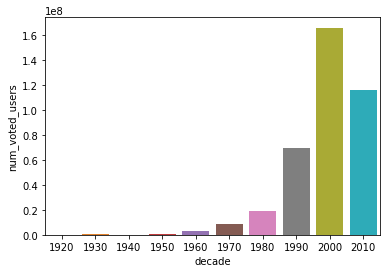

In [36]:
# Write your code for plotting number of voted users vs decade
sns.barplot(df_by_decade.index,df_by_decade['num_voted_users'])
plt.show()